In [1]:
# TODO Support Vector Machines

# Load features from file, then apply model
# Try diff params, give accuracies, misclassification rates for each dataset
# Plot confusion matrix, ROC, DET
# Inbuilt libraries ALLOWED
# Do on three forms of data -- normal, after PCA, after LDA

In [16]:
# Importing of Important Packages
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# SVM on Handwriting Data

In [3]:
with open("Data/Pickles/char_lda_train.pkl","rb") as f:
    train_feats = pickle.load(f)
classes = sorted(list(train_feats.keys()))
cl0_fn = sorted(list(train_feats[classes[0]].keys()))

In [5]:
X = np.array(sum([[cl]*len(list(train_feats[cl].keys())) for cl in classes],[]))
Y = []
for cl in classes:
    for fn in sorted(list(train_feats[cl].keys())):
        Y.append(train_feats[cl][fn])
        
Y = np.array(Y)
#print(X)
#print(Y)
#classifier.fit(X,y)

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_15500\339730426.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array(Y)


# SVM on Synthetic Data

In [6]:
syn_train = np.loadtxt("Data/Synthetic/train.txt",delimiter=",")
syn_dev = np.loadtxt("Data/Synthetic/dev.txt",delimiter=",")

In [7]:
# Separate train data into X and y
X_train_syn = syn_train[:,0:2]
y_train_syn = syn_train[:,2]
X_dev_syn = syn_dev[:,0:2]
y_dev_syn = syn_dev[:,2]

# Create the SVM Classifier
classifier = make_pipeline(StandardScaler(), svm.SVC(C=1e6, kernel="rbf", gamma="auto"))

# Fit the data to X and y
classifier.fit(X_train_syn,y_train_syn)
preds = classifier.predict(X_dev_syn)

(1000,)


In [15]:
# Calculate Accuracy:
errs = preds - y_dev_syn
mistakes = np.count_nonzero(errs)
print(mistakes)
acc = 1 - mistakes/(len(y_dev_syn))
print(f"Accuracy = {acc}")

0
Accuracy = 1.0


Reference for Plotting Function:

https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python

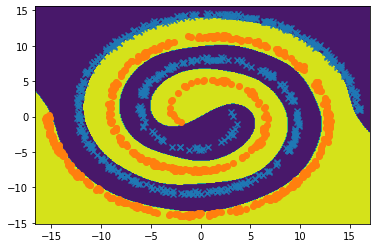

In [9]:
def contour_plot(classifier, x2d, y2d):
    z_plot = classifier.predict(np.c_[x2d.ravel(),y2d.ravel()]).reshape(x2d.shape)
    plt.contourf(x2d,y2d,z_plot)
def make_meshgrid(x, y, h=0.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
x_plot, y_plot = make_meshgrid(X_train_syn[:,0], X_train_syn[:,1])
contour_plot(classifier,x_plot,y_plot)
plt.scatter(X_dev_syn[:500,0],X_dev_syn[:500,1],marker="x")
plt.scatter(X_dev_syn[500:,0],X_dev_syn[500:,1],marker="o")
plt.show()

In [ ]:
# Take command line args
# feature type - normal, LDA, PCA
# dataset - Image, Synthetic, IsolatedDigits, HandwrittenCharacters